In [16]:
# imports
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage.morphology import footprint_rectangle
from skimage.filters.rank import mean

Hay en total 34 niveles de intensidad


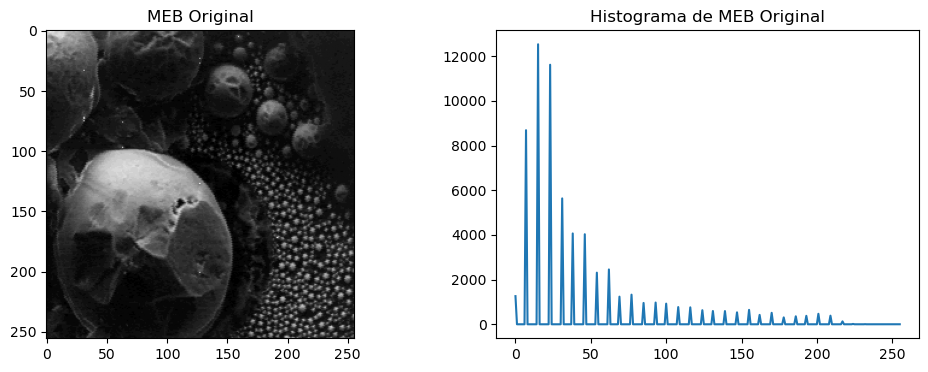

In [15]:
meb = cv2.imread('images/MEB.png', cv2.IMREAD_GRAYSCALE)
meb_hist = cv2.calcHist([meb], [0], None, [256], [0, 256])

niveles = np.count_nonzero(meb_hist)
print(f"Hay en total {niveles} niveles de intensidad")

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].imshow(meb, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('MEB Original')
ax[1].plot(meb_hist)
ax[1].set_title('Histograma de MEB Original')
plt.show()


**Describa su forma: ¿es continuo/discontinuo?, ¿cuántos niveles de gris diferentes tiene?**

La forma del histograma es discontinua, ya que se observan picos en niveles de gris específicos separados por intervalos donde la frecuencia es aproximadamente 0, lo que indica que no todos los valores entre 0 y 255 están presentes en la imagen. Aunque el rango alcanza valores cercanos a 255, la cantidad de niveles de gris utilizados es menor que 256, pues solo ciertos niveles presentan ocurrencias.

**¿cuáles son estos niveles de gris?**

Dentro de la imagen se presentan al rededor de 34 niveles de gris dentro de la imagen.

**¿Cuantos bits tiene la imagen según el histograma**

La imagen presenta al rededor de 256 valores posibles, por lo que esta tiene un total de 8 bits.

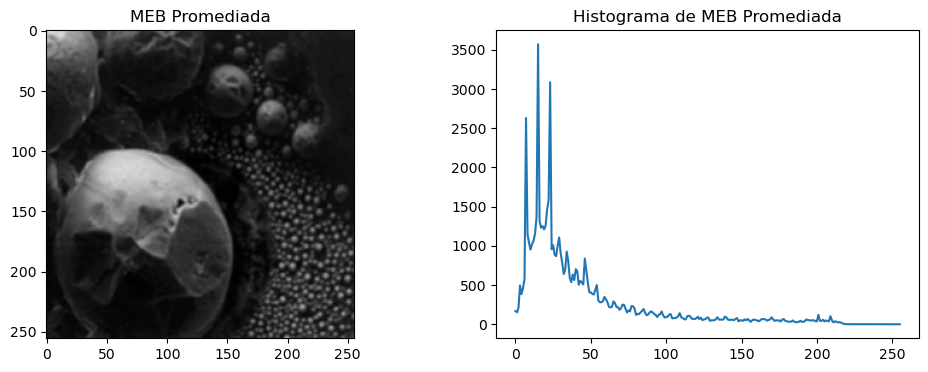

In [17]:
meb_avg = mean(meb, footprint_rectangle((3,3)))
meb_avg_hist = cv2.calcHist([meb_avg], [0], None, [256], [0, 256])

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].imshow(meb_avg, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('MEB Promediada')
ax[1].plot(meb_avg_hist)
ax[1].set_title('Histograma de MEB Promediada')
plt.show()


**¿cómo es la imagen resultado?**

La imagen promediada se ve en grandes razgos de peor calidad dado que esta se encuentra suabizada por el filtro. En esta segunda foto se pierde detalle de luminosidad y calidad en los bordes de los circulos, se observa de forma notoria en los circulitos pequeños que se encuentran en la parte inferior de la imagen, donde en la original estos se ven bien definidos, mientras que para la segunda imagen ya se contemplan como borrosos.

**Histograma Original VS Histograma Promediado**

La diferencia más notoria entre ambos histogramas es la continuidad en la distribución de los niveles de gris. El histograma original presentaba una forma discontinua, con varios niveles cuya frecuencia era 0, generando picos aislados. En cambio, el histograma de la imagen promediada muestra una distribución más continua y uniforme, donde prácticamente no se observan intervalos con frecuencia nula. Esto se debe a que el filtro de promedio suaviza la imagen, redistribuyendo las intensidades y generando nuevos niveles intermedios, lo que produce una transición más gradual entre valores de gris.

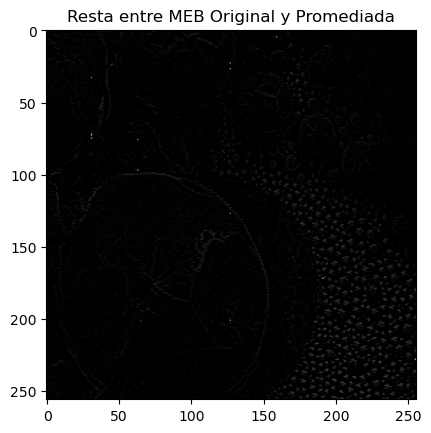

In [18]:
subtraction = cv2.subtract(meb, meb_avg)
plt.imshow(subtraction, cmap='gray', vmin=0, vmax=255)
plt.title('Resta entre MEB Original y Promediada')
plt.show()

**¿en cuáles regiones de la imagen son visibles las diferencias?, ¿por qué?**